<a href="https://colab.research.google.com/github/restrepo/medicion/blob/master/cienciometria/WOS_SCI_SCP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# WOS+SCI+SCP+PTJ+CTR

Make the Venn diagramas for the bibliographic datasets for 
* Web of Science (WOS), 
* Scielo (SCI)
* Scopus  (SCP)
* Puntaje (UDEA)
* Center (CTR)
of the scientific articles of Universidad de Antioquia. 

They were created with:

[WOS_SCI_SCP_PTJ_CTR.ipynb](./WOS_SCI_SCP_PTJ_CTR.ipynb)

In [1]:
import os
VERSION='NEW'
if os.getcwd()=='/content':
    !pip install openpyxl xlrd wosplus > /dev/null

## functions

In [2]:
import pandas as pd
import wosplus as wp
pd.set_option('display.max_colwidth',200)
from venn import draw_venn, generate_colors
import numpy as np

In [22]:
def bin_to_label(r,labels=["WOS","SCI","SCP","UDEA"],sep='_'):
    import re
    r=re.sub('0([0-1]{3})',r'\1',r)
    r=re.sub('1([0-1]{3})',r'{}{}\1'.format(labels[0],sep),r)
    r=re.sub('(\w*)0([0-1]{2})',r'\1\2',r)
    r=re.sub('(\w*)1([0-1]{2})',r'\1{}{}\2'.format(labels[1],sep),r)
    r=re.sub('([\w_]*)0([0-1]{1})',r'\1\2',r)
    r=re.sub('([\w_]*)1([0-1]{1})',r'\1{}{}\2'.format(labels[2],sep),r)
    r=re.sub('([\w_]*)0',r'\1',r)
    r=re.sub('([\w_]*)1',r'\1{}'.format(labels[3]),r)
    r=re.sub('_$','',r)
    return r

def fill_petals_labels(petal_labels,counts,labels=["WOS","SCI","SCP","UDEA"],sep='_'):
    for i in ['0','1']:
        for j in ['0','1']:
            for k in ['0','1']:
                for l in ['0','1']:
                    r=i+j+k+l
                    lb=bin_to_label(r,labels=labels,sep=sep)
                    if lb and counts.get(lb):
                        print(r,lb,counts.get(lb))
                        petal_labels[r] = counts.get(lb)
                    
    return petal_labels

def fill_draw_venn(df,Tipo='Tipo',labels=["WOS","SCI","SCP","UDEA"],sep='_'):
    counts=df.groupby(Tipo)[Tipo].count()
    petal_labels={}
    fill_petals_labels(petal_labels,counts,labels=labels,sep=sep)
    print(petal_labels)
    draw_venn(
        petal_labels=petal_labels, dataset_labels=labels,
        hint_hidden=False, colors=generate_colors(n_colors=4),
        figsize=(8, 8), fontsize=14, legend_loc="best", ax=None
    )
    return petal_labels

##  Configure public links of  files in Google Drive
* If it is a Google Spreadsheet the corresponding file is downloaded as CSV
* If it is in excel or text file the file is downloaded  directly

To define your  own labeled IDs for public google drive files edit the next cell:

In [6]:
%%writefile drive.cfg
[FILES]
WOS_SCI_SCP_PTJ_CTR.json.gz=19E1C1kRk4I0V3uXojqko8-NEicWaPp1j
WOS_SCP_UDEA_SJR_SIU.xlsx=0BxoOXsn2EUNIQ3R4WDhvSzVLQ2s
Base_de_datos_investigadores_Definitiva.csv=12oalgUeKhpvzkTPBP8pXCeHTrF-KO223dy9ov9w9QKs
UDEA_authors_with_WOS_info.json=1o1eVT4JD0FMMICq_oxrTJOzWh47veBMw
produccion_fecha_vig_2003_2018.xlsx=1WbtX4K__TTLxXRjuLvqUYz9tuHCIlS5v
UDEA_WOS_SCI_SCP_PTJ.json=1OkVytKbxJwGvXZDkynkSoUDtkUOTaT4A

Overwriting drive.cfg


##  Load data bases

In [7]:
affil='Univ Antioquia'
drive_files=wp.wosplus('drive.cfg')

#### DEBUG: if False stop in UDEA_PTJ!!!!

if os.path.exists(UDEAjsonfile):
    UDEA=               pd.read_json(UDEAjsonfile,compression='gzip').reset_index(drop=True)
else:    
    UDEA=drive_files.read_drive_json(UDEAjsonfile,compression='gzip').reset_index(drop=True)

In [8]:
UDEAjsonfile='WOS_SCI_SCP_PTJ_CTR.json.gz'
tmp=drive_files.load_biblio(UDEAjsonfile,compression='gzip')# TODO CHANGE FOR LAST VERSION IN GOOGLE DRIVE
UDEA=drive_files.biblio['WOS'].copy().reset_index(drop=True)

##  Quality checks

In [9]:
print( UDEA[UDEA.UDEA_nombre!=''].shape[0]+UDEA[UDEA.UDEA_nombre==''].shape[0],
      '=',UDEA.shape[0])

kk=UDEA[UDEA.UDEA_nombre=='']
kk[kk.Tipo.str.contains('UDEA')].shape[0]

15700 = 15700


0

In [10]:
UDEA_YES=UDEA[UDEA.UDEA_nombre!=''].reset_index(drop=True)
UDEA_NOT=UDEA[UDEA.UDEA_nombre==''].reset_index(drop=True)

In [11]:
UDEA_YES['Tipo']=UDEA_YES.Tipo.str.replace('([SW][CO][SIP])$',r'\1_UDEA')

In [12]:
UDEA=UDEA_YES.append(UDEA_NOT)
UDEA=UDEA.reset_index(drop=True)

In [13]:
#UDEA['Tipo']=UDEA['Tipo'].str.replace('SCI_SCP','SCP_SCI')

In [14]:
UDEA[UDEA.Tipo.str.contains('UDEA')].shape

(10312, 181)

In [15]:
drive_files.biblio['WOS']=UDEA.copy().reset_index(drop=True)

In [16]:
counts=drive_files.biblio['WOS'].groupby('Tipo')['Tipo'].count()
counts

Tipo
SCI                  809
SCI_SCP              347
SCI_SCP_UDEA        1269
SCI_UDEA            2083
SCP                 1489
SCP_UDEA            1084
WOS                 1168
WOS_SCI               54
WOS_SCI_SCP          169
WOS_SCI_SCP_UDEA     599
WOS_SCI_UDEA          93
WOS_SCP             1352
WOS_SCP_UDEA        4468
WOS_UDEA             716
Name: Tipo, dtype: int64

In [17]:
labels=["WOS","SCI","SCP","UDEA"]

0010 SCP 1489
0011 SCP_UDEA 1084
0100 SCI 809
0101 SCI_UDEA 2083
0110 SCI_SCP 347
0111 SCI_SCP_UDEA 1269
1000 WOS 1168
1001 WOS_UDEA 716
1010 WOS_SCP 1352
1011 WOS_SCP_UDEA 4468
1100 WOS_SCI 54
1101 WOS_SCI_UDEA 93
1110 WOS_SCI_SCP 169
1111 WOS_SCI_SCP_UDEA 599
{'1010': 1352, '0110': 347, '0010': 1489, '0011': 1084, '1011': 4468, '0100': 809, '1111': 599, '1001': 716, '0101': 2083, '1101': 93, '0111': 1269, '1000': 1168, '1110': 169, '1100': 54}


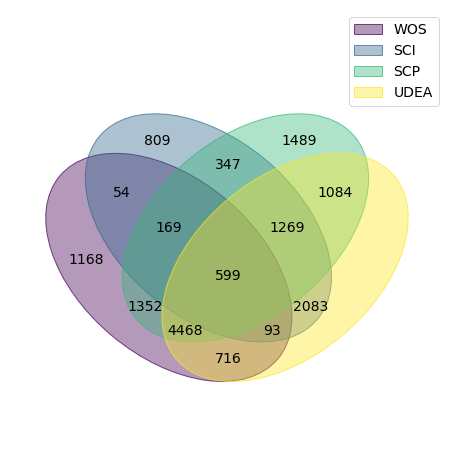

In [24]:
petal_labels=fill_draw_venn(drive_files.biblio['WOS'],Tipo='Tipo',
              labels=labels,sep='_')

Total

In [25]:
UDEA.shape

(15700, 181)

UDEA

In [26]:
x=[ (bin_to_label(r), petal_labels[r])[1]  for r in petal_labels  if bin_to_label(r).find('UDEA')>-1 ]
sum(x)

10312

NOT_UDEA

In [27]:
x=[ (bin_to_label(r), petal_labels[r])[1]  for r in petal_labels  if bin_to_label(r).find('UDEA')==-1 ]
sum(x)

5388

## By centros

In [28]:
facultades=UDEA.UDEA_authors.apply(lambda l: 
                         [d.get('FACULTAD') for d in l] 
                          if type(l)==list else None).str[0].dropna().unique()

In [29]:
facultades

array(['Facultad de Ciencias Sociales y Humanas', 'Facultad de Medicina',
       'Facultad de Ciencias Agrarias',
       'Facultad de Ciencias Exactas y Naturales',
       'Facultad de Ingeniería', 'Facultad de Artes'], dtype=object)

Facultad de Ciencias Sociales y Humanas
0010 SCP 5
0011 SCP_UDEA 15
0100 SCI 3
0101 SCI_UDEA 68
0110 SCI_SCP 1
0111 SCI_SCP_UDEA 32
1000 WOS 15
1001 WOS_UDEA 13
1010 WOS_SCP 9
1011 WOS_SCP_UDEA 39
1100 WOS_SCI 1
1101 WOS_SCI_UDEA 6
1111 WOS_SCI_SCP_UDEA 8
{'1010': 9, '0110': 1, '0010': 5, '0011': 15, '1011': 39, '0100': 3, '1001': 13, '0101': 68, '1101': 6, '0111': 32, '1000': 15, '1111': 8, '1100': 1}


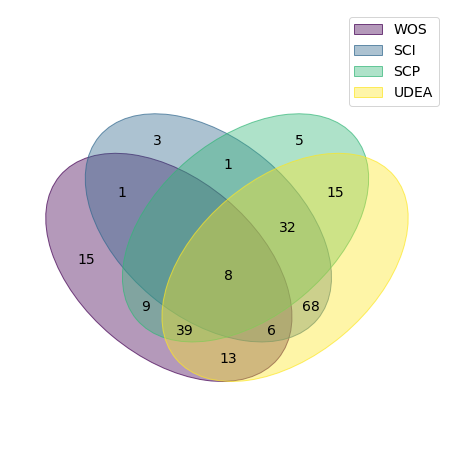

In [30]:
i=0
f=facultades[i]
print(f)
dfF=UDEA[ UDEA.UDEA_authors.apply(lambda l: True in 
                         [d.get('FACULTAD')==f for d in l] 
                          if type(l)==list else False)]
dfF=dfF.reset_index(drop=True)
pl=fill_draw_venn(dfF,Tipo='Tipo',labels=labels,sep='_')

Facultad de Medicina
0010 SCP 85
0011 SCP_UDEA 237
0100 SCI 91
0101 SCI_UDEA 409
0110 SCI_SCP 45
0111 SCI_SCP_UDEA 474
1000 WOS 128
1001 WOS_UDEA 218
1010 WOS_SCP 120
1011 WOS_SCP_UDEA 1070
1100 WOS_SCI 2
1101 WOS_SCI_UDEA 15
1110 WOS_SCI_SCP 37
1111 WOS_SCI_SCP_UDEA 147
{'1010': 120, '0110': 45, '0010': 85, '0011': 237, '1011': 1070, '0100': 91, '1111': 147, '1001': 218, '0101': 409, '1101': 15, '0111': 474, '1000': 128, '1110': 37, '1100': 2}


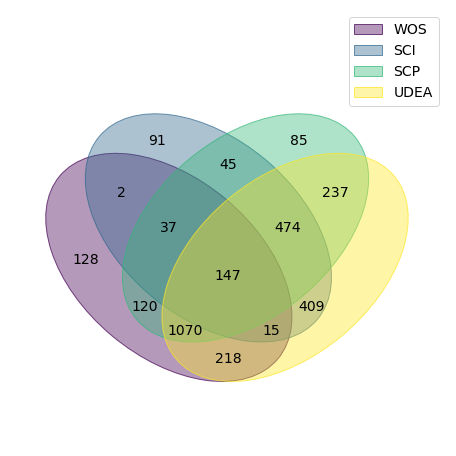

In [32]:
i=1
f=facultades[i]
print(f)
dfF=UDEA[ UDEA.UDEA_authors.apply(lambda l: True in 
                         [d.get('FACULTAD')==f for d in l] 
                          if type(l)==list else False)]
dfF=dfF.reset_index(drop=True)
pl=fill_draw_venn(dfF,Tipo='Tipo',labels=labels,sep='_')

Facultad de Ciencias Agrarias
0010 SCP 16
0011 SCP_UDEA 117
0100 SCI 7
0101 SCI_UDEA 116
0111 SCI_SCP_UDEA 67
1000 WOS 7
1001 WOS_UDEA 49
1010 WOS_SCP 6
1011 WOS_SCP_UDEA 159
1100 WOS_SCI 5
1101 WOS_SCI_UDEA 8
1110 WOS_SCI_SCP 5
1111 WOS_SCI_SCP_UDEA 94
{'1010': 6, '1001': 49, '0010': 16, '0011': 117, '1011': 159, '0100': 7, '1111': 94, '0101': 116, '1101': 8, '0111': 67, '1000': 7, '1110': 5, '1100': 5}


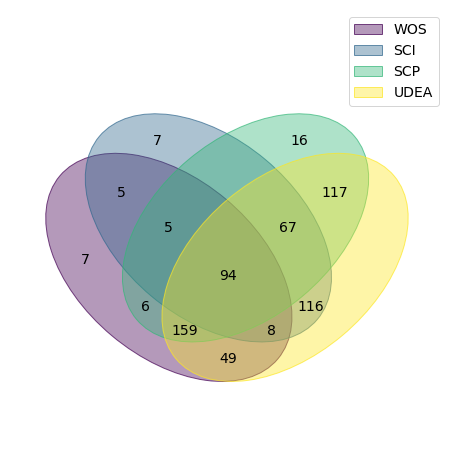

In [33]:
i=2
f=facultades[i]
print(f)
dfF=UDEA[ UDEA.UDEA_authors.apply(lambda l: True in 
                         [d.get('FACULTAD')==f for d in l] 
                          if type(l)==list else False)]
dfF=dfF.reset_index(drop=True)
pl=fill_draw_venn(dfF,Tipo='Tipo',labels=labels,sep='_')

Facultad de Ciencias Exactas y Naturales
0010 SCP 32
0011 SCP_UDEA 158
0100 SCI 17
0101 SCI_UDEA 123
0110 SCI_SCP 11
0111 SCI_SCP_UDEA 82
1000 WOS 23
1001 WOS_UDEA 104
1010 WOS_SCP 63
1011 WOS_SCP_UDEA 1542
1100 WOS_SCI 2
1101 WOS_SCI_UDEA 6
1110 WOS_SCI_SCP 7
1111 WOS_SCI_SCP_UDEA 85
{'1010': 63, '0110': 11, '0010': 32, '0011': 158, '1011': 1542, '0100': 17, '1111': 85, '1001': 104, '0101': 123, '1101': 6, '0111': 82, '1000': 23, '1110': 7, '1100': 2}


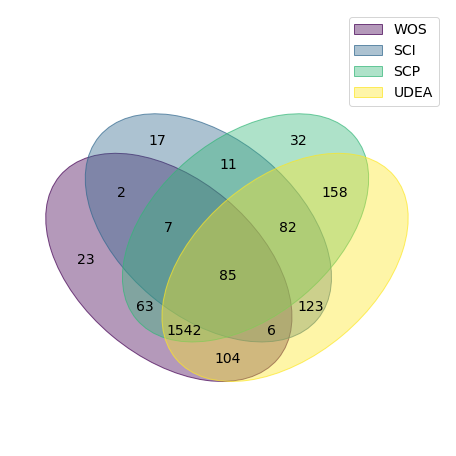

In [34]:
i=3
f=facultades[i]
print(f)
dfF=UDEA[ UDEA.UDEA_authors.apply(lambda l: True in 
                         [d.get('FACULTAD')==f for d in l] 
                          if type(l)==list else False)]
dfF=dfF.reset_index(drop=True)
pl=fill_draw_venn(dfF,Tipo='Tipo',labels=labels,sep='_')

Facultad de Ingeniería
0010 SCP 44
0011 SCP_UDEA 219
0100 SCI 15
0101 SCI_UDEA 234
0110 SCI_SCP 5
0111 SCI_SCP_UDEA 159
1000 WOS 22
1001 WOS_UDEA 93
1010 WOS_SCP 60
1011 WOS_SCP_UDEA 820
1101 WOS_SCI_UDEA 16
1110 WOS_SCI_SCP 2
1111 WOS_SCI_SCP_UDEA 89
{'1010': 60, '0110': 5, '0010': 44, '0011': 219, '1011': 820, '0100': 15, '1111': 89, '1001': 93, '0101': 234, '1101': 16, '0111': 159, '1000': 22, '1110': 2}


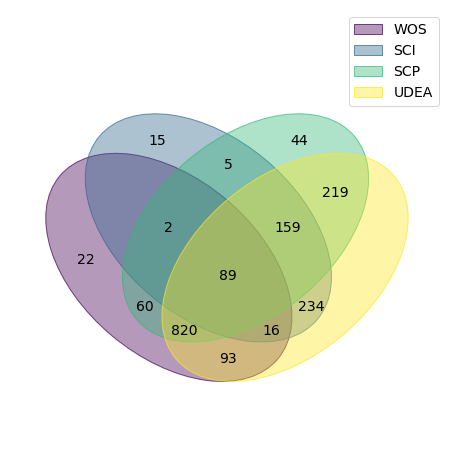

In [35]:
i=4
f=facultades[i]
print(f)
dfF=UDEA[ UDEA.UDEA_authors.apply(lambda l: True in 
                         [d.get('FACULTAD')==f for d in l] 
                          if type(l)==list else False)]
dfF=dfF.reset_index(drop=True)
pl=fill_draw_venn(dfF,Tipo='Tipo',labels=labels,sep='_')

Facultad de Artes
0011 SCP_UDEA 2
0101 SCI_UDEA 4
0110 SCI_SCP 1
0111 SCI_SCP_UDEA 1
1001 WOS_UDEA 2
1010 WOS_SCP 1
1011 WOS_SCP_UDEA 1
1111 WOS_SCI_SCP_UDEA 1
{'1010': 1, '1001': 2, '1111': 1, '0011': 2, '0111': 1, '1011': 1, '0110': 1, '0101': 4}


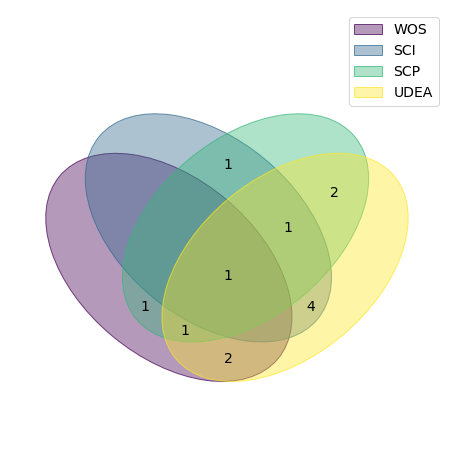

In [36]:
i=5
f=facultades[i]
print(f)
dfF=UDEA[ UDEA.UDEA_authors.apply(lambda l: True in 
                         [d.get('FACULTAD')==f for d in l] 
                          if type(l)==list else False)]
dfF=dfF.reset_index(drop=True)
pl=fill_draw_venn(dfF,Tipo='Tipo',labels=labels,sep='_')